In [6]:
#y =  bo + b1x1 + b2X2
# Question 6 a
y = 1 / (1 + (1/ exp(-6  + 0.05 * 40 + 3.5)))
y

[1] 0.3775407

In [ ]:
# Question 6 b
0.5 = 1 / (1 + (1/ exp(-6  + 0.05 * X1 + 3.5)))


In [7]:
# Question 8
We would use logistic regression for this case as test error rate is less than 1 nearest neighbour

ERROR: Error in eval(expr, envir, enclos): object 'e' not found


In [ ]:
#Question 9 A
0.37/1-0.37

#Question 9 B
0.16/1-0.16

In [31]:
library(ISLR)
Weekly <- ISLR::Weekly

In [32]:
Weekly$Direction <- factor(Weekly$Direction, levels = c("Up", "Down"))

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

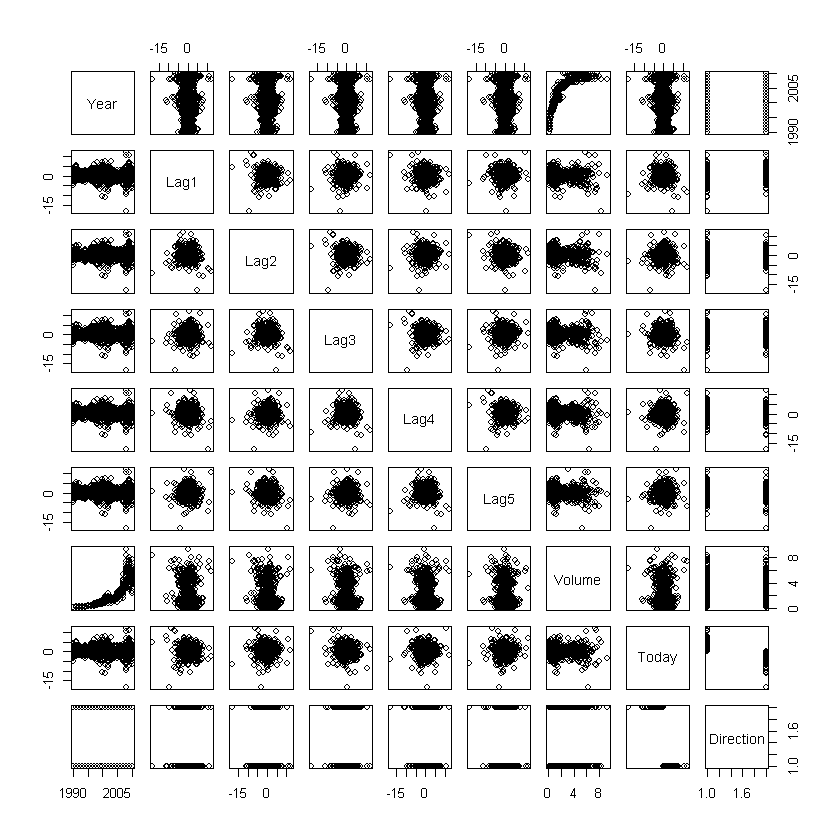

In [33]:
#Quetsion A
print(summary(Weekly))
pairs(Weekly)
#There does not seem to be any major factor

In [34]:
lm <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, family = "binomial", data = Weekly)
summary(lm)
#lag2 appears significant


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4579  -1.0849  -0.9913   1.2565   1.6949  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.26686    0.08593  -3.106   0.0019 **
Lag1         0.04127    0.02641   1.563   0.1181   
Lag2        -0.05844    0.02686  -2.175   0.0296 * 
Lag3         0.01606    0.02666   0.602   0.5469   
Lag4         0.02779    0.02646   1.050   0.2937   
Lag5         0.01447    0.02638   0.549   0.5833   
Volume       0.02274    0.03690   0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [39]:
library(caret)
probs = predict(lm, type="response")
pred = rep("Down", length(probs))
pred[probs>.5] = "Up"
pred <- factor(pred, levels = c("Up", "Down"))
confusionMatrix(Weekly$Direction, pred)

Confusion Matrix and Statistics

          Reference
Prediction  Up Down
      Up    48  557
      Down  54  430
                                         
               Accuracy : 0.4389         
                 95% CI : (0.4092, 0.469)
    No Information Rate : 0.9063         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : -0.0292        
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.47059        
            Specificity : 0.43566        
         Pos Pred Value : 0.07934        
         Neg Pred Value : 0.88843        
             Prevalence : 0.09366        
         Detection Rate : 0.04408        
   Detection Prevalence : 0.55556        
      Balanced Accuracy : 0.45313        
                                         
       'Positive' Class : Up             
                                         

In [41]:
train = (Year < 2009 & Year > 1990)
test = Weekly[!train,]
lm = glm(Direction ~ Lag2, family = "binomial", data = Weekly, subset=train)

In [43]:
probs = predict(lm, test)
pred = rep("Down", length(probs))
pred[probs>.5] = "Up"
pred <- factor(pred, levels = c("Up", "Down"))
confusionMatrix(test$Direction, pred)

Confusion Matrix and Statistics

          Reference
Prediction Up Down
      Up    0   85
      Down  0   66
                                          
               Accuracy : 0.4371          
                 95% CI : (0.3566, 0.5201)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity :     NA          
            Specificity : 0.4371          
         Pos Pred Value :     NA          
         Neg Pred Value :     NA          
             Prevalence : 0.0000          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.5629          
      Balanced Accuracy :     NA          
                                          
       'Positive' Class : Up              
                              

In [60]:
library(MASS)
lda = lda(Direction ~ Lag2, data=Weekly, subset=train)

In [64]:
pred = predict(lda, test)
confusionMatrix(test$Direction, pred$class)

Confusion Matrix and Statistics

          Reference
Prediction Up Down
      Up   79    6
      Down 56   10
                                          
               Accuracy : 0.5894          
                 95% CI : (0.5065, 0.6687)
    No Information Rate : 0.894           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0884          
                                          
 Mcnemar's Test P-Value : 4.877e-10       
                                          
            Sensitivity : 0.5852          
            Specificity : 0.6250          
         Pos Pred Value : 0.9294          
         Neg Pred Value : 0.1515          
             Prevalence : 0.8940          
         Detection Rate : 0.5232          
   Detection Prevalence : 0.5629          
      Balanced Accuracy : 0.6051          
                                          
       'Positive' Class : Up              
                              

In [65]:
qda = qda(Direction ~ Lag2, data=Weekly, subset=train)
pred = predict(qda, test)
confusionMatrix(test$Direction, pred$class)

Confusion Matrix and Statistics

          Reference
Prediction Up Down
      Up   85    0
      Down 66    0
                                          
               Accuracy : 0.5629          
                 95% CI : (0.4799, 0.6434)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.235e-15       
                                          
            Sensitivity : 0.5629          
            Specificity :     NA          
         Pos Pred Value :     NA          
         Neg Pred Value :     NA          
             Prevalence : 1.0000          
         Detection Rate : 0.5629          
   Detection Prevalence : 0.5629          
      Balanced Accuracy :     NA          
                                          
       'Positive' Class : Up              
                              

In [85]:
#Of the above lda performs best

In [5]:
#Question 11
library(ISLR)
Auto <- Auto
mpg01 = rep(0, length(Auto$mpg))
med = median(Auto$mpg)
mpg01[Auto$mpg > med] = 1
Auto <- cbind(Auto, mpg01)
Auto$mpg01 <- factor(Auto$mpg01)

In [6]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

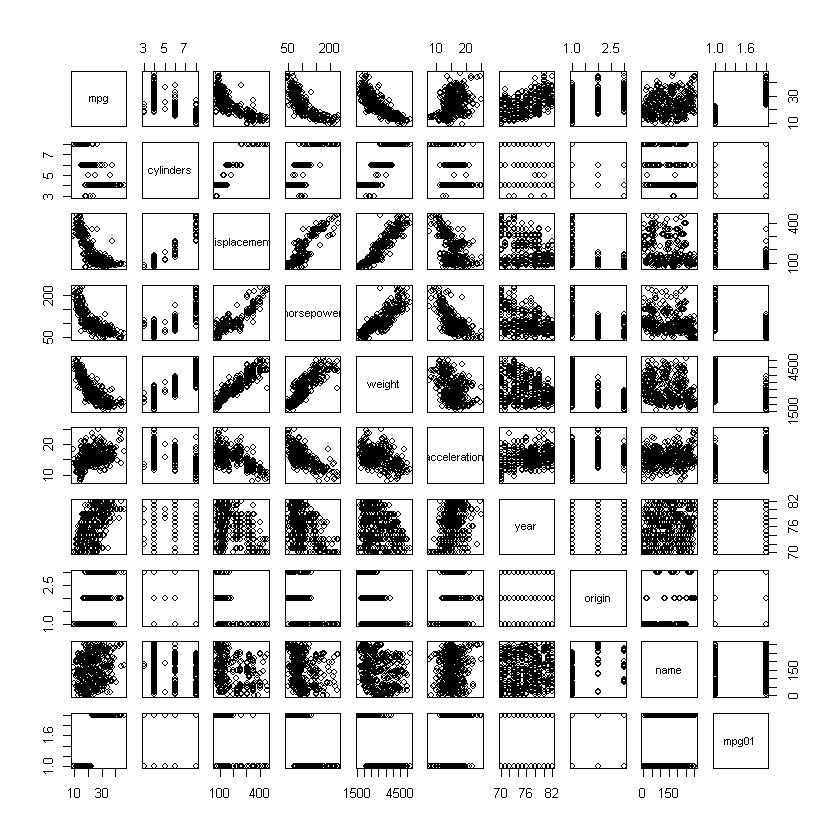

In [7]:
pairs(Auto)

In [12]:
str(Auto)

'data.frame':	392 obs. of  10 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 $ mpg01       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [30]:
train_ind = (Auto$year %% 2 == 0) # if the year is even
train = Auto[train_ind,]
test = Auto[-train_ind,]

In [41]:
library(MASS)
library(caret)
lda = lda(mpg01 ~ cylinders + weight + displacement + horsepower, data=train)
pred = predict(lda, test)
confusionMatrix(test$mpg01, pred$class)

Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 169  26
         1  13 183
                                          
               Accuracy : 0.9003          
                 95% CI : (0.8662, 0.9281)
    No Information Rate : 0.5345          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8005          
                                          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.9286          
            Specificity : 0.8756          
         Pos Pred Value : 0.8667          
         Neg Pred Value : 0.9337          
             Prevalence : 0.4655          
         Detection Rate : 0.4322          
   Detection Prevalence : 0.4987          
      Balanced Accuracy : 0.9021          
                                          
       'Positive' Class : 0               
                              

In [42]:
qda = qda(mpg01 ~ cylinders + weight + displacement + horsepower, data=train)
pred = predict(qda, test)
confusionMatrix(test$mpg01, pred$class)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 174  21
         1  19 177
                                          
               Accuracy : 0.8977          
                 95% CI : (0.8633, 0.9259)
    No Information Rate : 0.5064          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7954          
                                          
 Mcnemar's Test P-Value : 0.8744          
                                          
            Sensitivity : 0.9016          
            Specificity : 0.8939          
         Pos Pred Value : 0.8923          
         Neg Pred Value : 0.9031          
             Prevalence : 0.4936          
         Detection Rate : 0.4450          
   Detection Prevalence : 0.4987          
      Balanced Accuracy : 0.8977          
                                          
       'Positive' Class : 0               
                              

In [43]:
glm = glm(mpg01~cylinders+weight+displacement+horsepower, data=train, family=binomial)
pred = predict(glm,test)